<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [18]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [19]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [20]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [47]:
# Task 1: Become Familiar with the Dataset
boston_df.head()

# boston_df.shape

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_label
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,Not River-bound
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,Not River-bound
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,Not River-bound
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,Not River-bound
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,Not River-bound


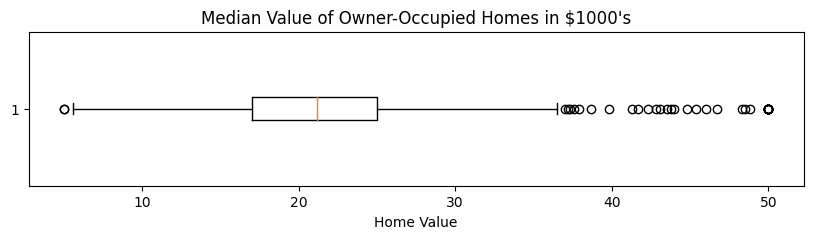

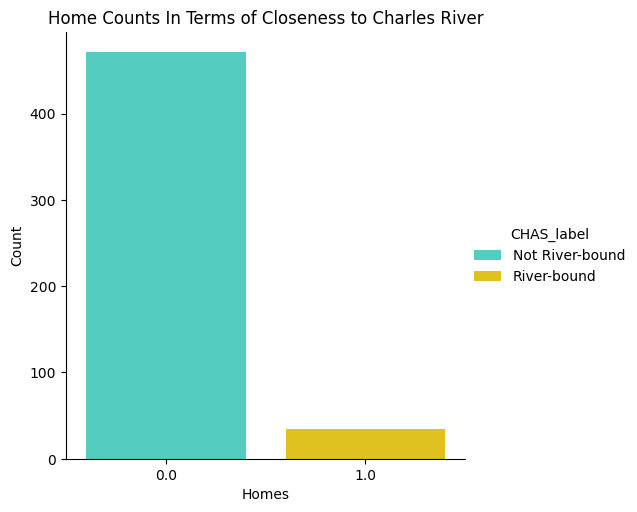

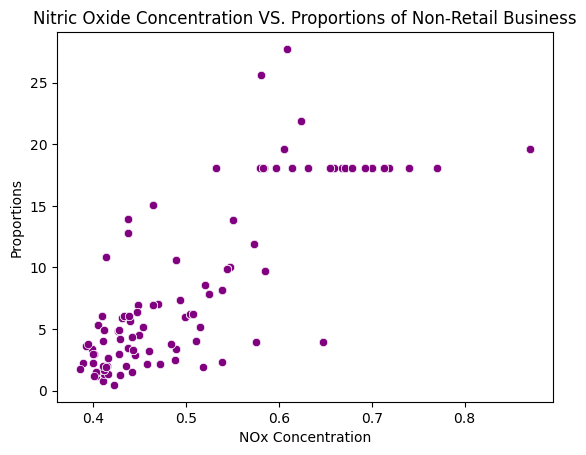

Text(0.5, 0, 'Ratio')

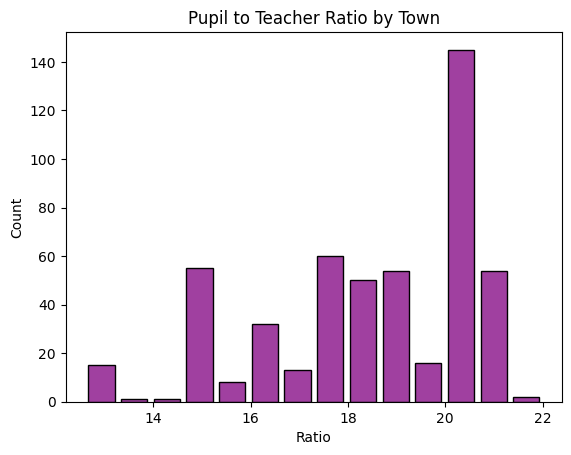

In [62]:
#Task 2: Generate Descriptive Statistics and Visualizations

#2.1 Get a sense of the dataset
boston_df.describe()

#2.2 Box plot for median value of owner-occupied homes MEDV
plt.figure(figsize = (10,2))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Median Value of Owner-Occupied Homes in $1000\'s')
plt.xlabel('Home Value')
plt.show()

#2.3 Bar plot for Charles river variable CHAS 
#assign labels to the binary data within CHAS column
boston_df.loc[boston_df['CHAS'] == 1, 'CHAS_label'] = 'River-bound'
boston_df.loc[boston_df['CHAS'] == 0, 'CHAS_label'] = 'Not River-bound' 
#plotting
sns.catplot(
    x='CHAS', 
    kind = 'count',
    data = boston_df,
    hue ='CHAS_label',
    height = 5,
    aspect = 1,
    palette = {'River-bound':'gold','Not River-bound':'turquoise'})
plt.title ('Home Counts In Terms of Closeness to Charles River')
plt.xlabel('Homes')
plt.ylabel('Count')
plt.show()


#2.4 Scatter plot between NOX and INDUS 
sns.scatterplot(x='NOX',y= 'INDUS', data = boston_df, color = 'purple') 
plt.title('Nitric Oxide Concentration VS. Proportions of Non-Retail Business')
plt.xlabel('NOx Concentration')
plt.ylabel('Proportions')
plt.show()
#There seems to be a positive correlation. Need to be tested for statistical significance. 


#2.5 Histogram for the pupil to teacher ratio variable
sns.histplot(x='PTRATIO', data = boston_df, shrink= 0.8, color ='purple')
plt.title('Pupil to Teacher Ratio by Town')
plt.xlabel('Ratio')


In [83]:
#Task 3: Statistical Test

#3.1 significant difference in median value of houses bound by the Charles river or not
#H0: "There is no significant difference"
#Ha: "There is significant difference depending on whether a home is bound by the river"

#run Levene's test to confirm if the variances of variables are equal
# null hypothesis
scipy.stats.levene(
    boston_df[boston_df['CHAS_label'] == 'River-bound']['MEDV'],
    boston_df[boston_df['CHAS_label'] == 'Not River-bound']['MEDV'], center = 'median')
# the p-value is 0.0326 < 0.05. Therefore, the null hypothesis that the variances are equal can be rejected.

#run ttest 
scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS_label'] == 'River-bound']['MEDV'],
    boston_df[boston_df['CHAS_label'] == 'Not River-bound']['MEDV'], equal_var = False) 
# The p-value is less than 0.05 which means there is enough evidence to reject the null hypothesis.
# In other words, there is enough evidence that whether a home is bound by the Charles River impacts its value.



#3.2 difference in median value of houses (MEDV) for each proportion of owner occupied units built prior tO 1940 (AGE)?
#H0: There is no difference in median value.
#Ha: At least one of the groups has different value. 

#Divide the AGE column into 4 groups.
data3 = boston_df[['AGE','MEDV']]
data3['AGE_LABEL']=pd.cut(data3['AGE'], bins = [0, 25, 50, 75, 101], labels = ['below 25', 'between 25 and 50','between 50 and 75','over 75'])

below25 = data3[data3['AGE_LABEL'] == 'below 25']['MEDV']
bet2550 = data3[data3['AGE_LABEL'] == 'between 25 and 50']['MEDV']
bet5075 = data3[data3['AGE_LABEL'] == 'between 50 and 75']['MEDV']
over75 = data3[data3['AGE_LABEL'] == 'over 75']['MEDV']

# run ANOVA test
f_statistic, p_value = scipy.stats.f_oneway(below25,bet2550,bet5075,over75)
print(f_statistic, p_value)
#The p_value is less than 0.05. Therefore, there is enough evidence to reject the null hypothesis and at lease one of the groups has a statistically significant difference.

#3.3 relationship between Nitric oxide and proportions of non-retail business acres per town 
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
#The pvalue is less than 0.05, which means there is a statistically significant correlation between the two variables. 

#3.4 impact of additional weighted distance to employment centers on the MEDV 
model = ols('MEDV ~ DIS', data = boston_df).fit()
model.summary()
#the Prob(F-statistic) is lower than 0.05 and the coefficient is 18.39, which suggest that there is a statistically significant positive correlation. 



<ipython-input-83-7dd6ea1caa43>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['AGE_LABEL']=pd.cut(data3['AGE'], bins = [0, 25, 50, 75, 101], labels = ['below 25', 'between 25 and 50','between 50 and 75','over 75'])


25.549830466017518 2.137213473971852e-15


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        17:02:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""